In [2]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

"激活函数"又称"非线性映射函数"，是深度卷积神经网络中不可或缺的关键模块。可以说，深度网络模型其强大的表示能力大部分是由激活函数的非线性带来的。

### Sigmoid型函数

Sigmoid型函数也称Logistic函数: $$ \sigma (x) = \frac{1}{(1+exp(-x))} $$

经过Sigmoid型函数作用后，输出值被压缩到[0, 1]之间，而0对应了生物神经元的"抑制状态"，1则恰好对应了"兴奋状态"。但对与Simogid函数两端大于5（或小于-5）的区域，这部分输出会被压缩到1（或0）。这样的处理会导致梯度的"饱和效应"（saturation effect）。

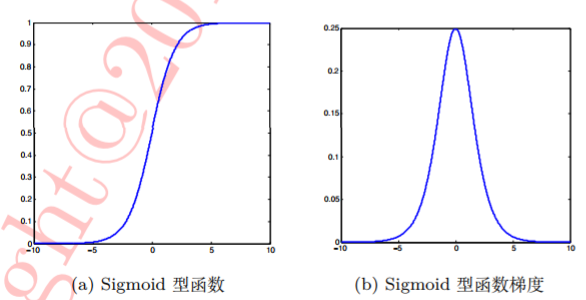

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function01.png')

如Sigmoid型函数的梯度图所示，大于5或小于5的部分梯度接近于0，这会导致在误差的反向传播中导数处于该区域的误差很难甚至无法传递到靠近输入层的部分的，即靠近输出层的部分参数已经更新好，但靠近输入层部分的参数还是和随机初始值差不多，导致整个网络效果很差。

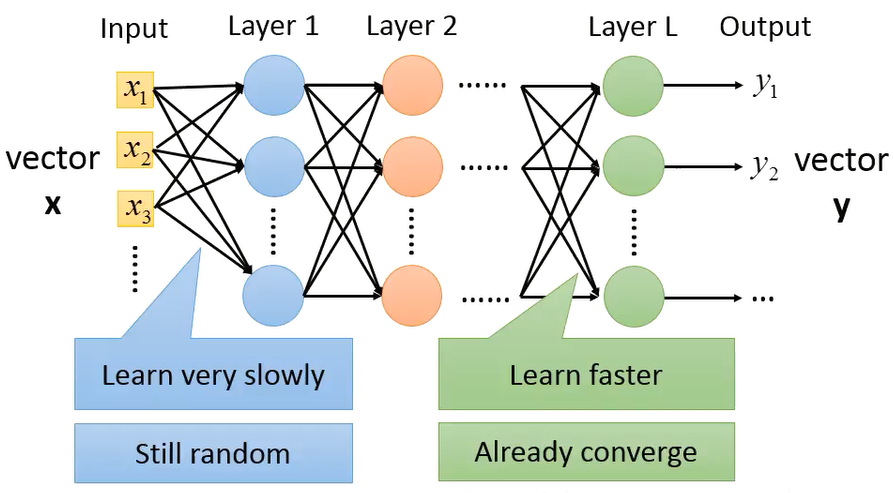

In [4]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Tips%20for%20Training%20Deep%20Neural%20Network/tips_for_training03.png')

另外一点，Sigmoid型函数值域的均值并非为0而是全为正0.5，这样的结果实际上并不符合我们对神经网络内数值的期望（均值）应为0的设想。为什么要选择接近0的参数？
- 假设训练集为(x, y)，通过一个简单的神经元训练得到z=Wx，我们要让预测值z与实际值y尽量接近；
- 现在有测试集(x', y)，假设x'=x+ϵ，ϵ为噪声，把x'代入学习好的模型中，即z'=W(x+ϵ)=z+Wϵ；
- 为了让噪声ϵ最小化，要让参数W最小化，尽可能让z'=z，这样使用训练好的模型，代入训练集和测试集，误差不会过大。

总结下Sigmoid函数缺点：1）当网络层较多时（大于3层），容易出现梯度弥散或梯度爆炸问题；2）Sigmoid函数值域的均值并非为0或接近于0，可能导致训练集的结果和测试集的结果，误差过大。

### tanh(x)型函数

tanh(x)型函数是在Sigmoid型函数的基础上为解决均值问题提出的激活函数： $$tanh(x) = 2\sigma 2(x) - 1$$

tanh(x)型函数又称作双曲正切函数（hyperbolic tangent function），其函数范围式（-1， +1），输出的均值为0。但由于tanh(x)型函数仍基于Sigmoid型函数，使用tanh(x)型函数依然会发生"梯度饱和"现象。

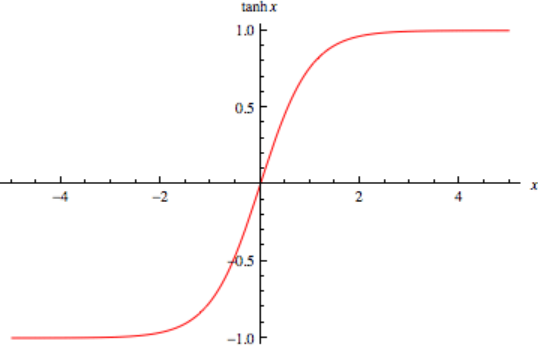

In [6]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function02.png')

### 修正线性单元（ReLU）

ReLU能有效避免梯度饱和现象的发生，是目前深度卷积神经网络中最为常用的激活函数之一。ReLU函数实际是一个分段函数，其定义为：$$ReLU(x) =  max(0, x) = \left\{\begin{matrix}
x & if \ x \geq 0\\ 
0 & if \ x < 0
\end{matrix}\right. $$

与前两个激活函数相比：ReLU函数的梯度在x≥0时为1，反之为0；对x≥0部分完全消除了Sigmoid型函数的梯度饱和效应。计算复杂度上，ReLU函数也相对前两者的指数函数计算更为简单。同时，实验中还发现ReLU函数有助于随机梯度下降方法收敛，收敛速度约快6倍左右。不过，ReLU函数也有自身缺陷，即在x<0时，梯度便为0。换句话说，对于小于0的这部分卷积结果响应，它们一旦变为负值将再无法影响网络训练，这种现象被称作"死区"。

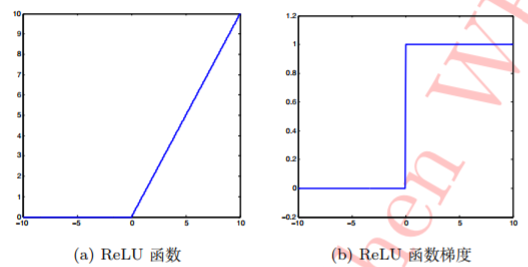

In [7]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function03.png')

### Leaky ReLU

为了缓解"死区"现象，研究者将ReLU函数中x<0的部分调整为f(x)=αx，其中α为0.01或0.001数量级的较小正数。这种新型的激活函数被称作"Leaky ReLU"：$$Leaky ReLU(x) = \left\{\begin{matrix}
x & if \ x \geq 0\\ 
\alpha \cdot x & if \ x < 0
\end{matrix}\right.$$

可以发现，原始ReLU函数实际上是Leaky ReLU函数的一个特例，即α=0。不过由于Leaky ReLU中α为超参数，合适的值较难设定且较为敏感，因此Leaky ReLU函数在实际使用中的性能并不十分稳定。

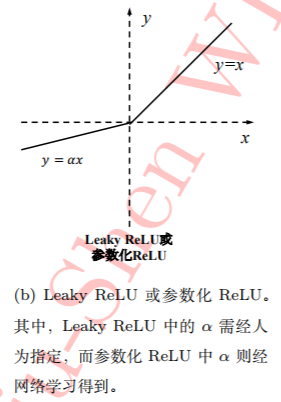

In [11]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function05.png')

### 参数化ReLU

参数化ReLU的提出解决了Leaky ReLU中超参数α不易设定的问题，它直接将α也作为一个网络中可学习的变量融入模型的整体训练过程。在求解参数化ReLU时，仍使用传统的误差反向传播和随机梯度下降，对于参数α的更新遵循链式法则。不过，参数化ReLU在带来更大自由度的同时，也增加了网络模型过拟合的风险，在实际使用中需格外注意。
- 根据实验结果，第一层卷积层搭配的参数化ReLU的α取值远大于ReLU中的0，表明网络较浅层所需非线性较弱。同时，我们知道浅层网络特征一般多为表示"边缘"、"纹理"等特性的泛化特征；
- 这一观察说明对于此类特征正负响应(activation)均很重要，这也解释了固定α取值的ReLU（α=0）和Leaky ReLU相比参数化ReLU性能较差的原因；
- 另外，α的取值呈现由浅层到深层依次递减的趋势，说明实际上网络所需的非线性能力随网络深度增加而增加。

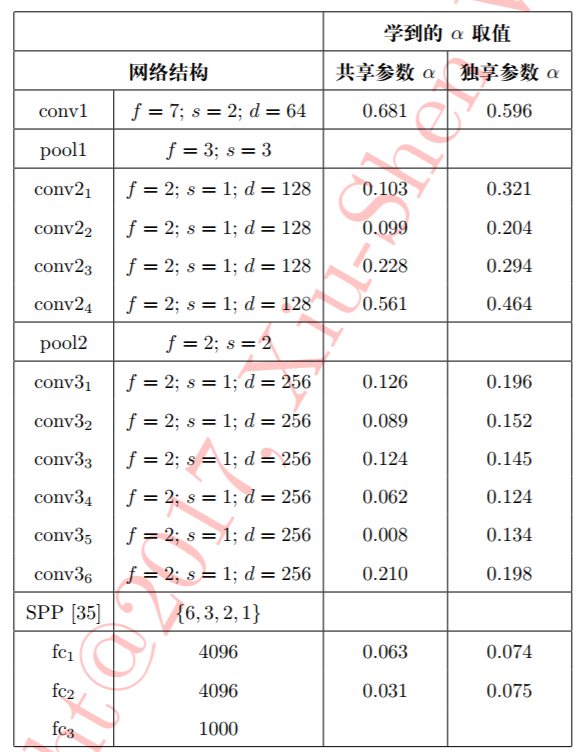

In [14]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function04.png')

### 随机化ReLU
另一种解决α超参设定的方式将其随机化，这便是随机化ReLU。对于随机化ReLU中α的设定，其取值在训练阶段服从均匀分布，在测试阶段则将其指定为该均匀分布对应的分布期望 (l+u)/2：$$Randomized \ ReLU(x) = \left\{\begin{matrix}
x & if \ x \geq 0\\ 
\alpha '\cdot x & if \ x < 0
\end{matrix}\right.$$

其中，$$\alpha ' \sim U(l, u), l < u, and \ l, u \in [0, 1)$$

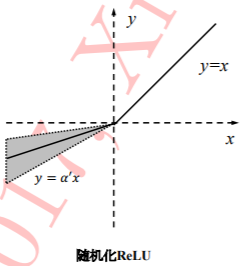

In [12]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function06.png')

### 指数化线性单元(ELU)
$$ ELU(x) = \left\{\begin{matrix}
x & if \ x \geq 0 \\ 
\lambda \cdot (exp(x)-1) & if \ x < 0 
\end{matrix}\right. $$

显然，ELU具备ReLU函数的优点，同时ELU也解决了ReLU函数自身的"死区"问题。不过，ELU函数中的指数操作稍稍增大了计算量。实际使用中，ELU中的超参数λ一般设置为1。

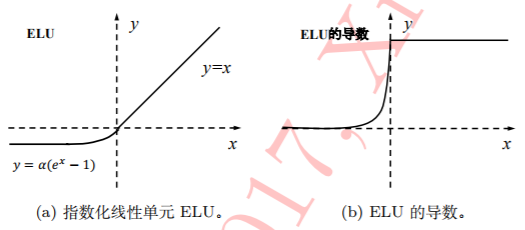

In [13]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Activation%20Function/activation_function07.png')

### 总结
- 首先使用目前最常用的ReLU激活函数，但需要注意模型初始化和学习率的设置；
- 为了进一步提高模型精度，可尝试Leaky ReLU、参数化ReLU、随机化ReLU和ELU。但四者之间实际性能优劣并不一致性结论，需具体问题具体分析。